# **Task 2. Topic Modelling:**
###**P.S. I seriously worked on this task as I tried two datasets and this is what I came up with but I don't feel that my information regarding this is complete yet!**
#**First trial**
1. In the first trial, I've performed a topic modeling on Twitter data to find what people are tweeting about in relation to climate change. 


Topic Modeling is a technique to extract the hidden topics from large volumes of text. Latent Dirichlet Allocation(LDA) is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package. 


##**2.1 Import Packages**




In [ ]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
# model building package
import sklearn

# package to clean text
import re

### Next we will read in this dataset and have a look at it.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ourcodingclub/CC-topic-modelling-python/master/climate_tweets.csv')
df.head(2)

,tweet
0,Global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...


In [ ]:
df.tweet[0]

'Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. [link]'

##**2.2. EDA - Time to start exploring our dataset**

In [ ]:
df.shape

(6090, 1)

So we have 6090 tweets 

##**Finding Retweets**
There are tweets that start with ‘RT’ and hence how many of them are retweets. Use the lines below to find out how many retweets there are in the dataset.

In [ ]:
# make a new column to highlight retweets
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

773

In [ ]:
df.head(2)

,tweet,is_retweet
0,Global warming report urges governments to act...,False
1,Fighting poverty and global warming in Africa ...,False


In [ ]:
 # number of unique retweets
df.loc[df['is_retweet']].tweet.unique().size

677

### **Let's see the popular tweets by counting the number of times that each tweet is repeated in our dataframe, and sort by the number of times that each tweet appears. Then look at the top 10 tweets.**





In [ ]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,tweet,counts
3131,No matter if you believe in global warming or ...,20
4555,Take Action @change: Help Protect Wildlife Hab...,14
4027,RT @newtgingrich: Historic snow storm in washi...,9
1765,Fight Climate Change From All Fronts: [link],8
1626,Earth's polar ice sheets vulnerable to even mo...,7
1941,Global Warming Dent's El Ni'o's Protective Shi...,7
1799,Foes of California's global warming law pour m...,6
1351,Coalition of the Tired of Waiting: Fighting Cl...,6
4271,SCIENCE: Scientists explore the evolution of c...,6
1040,Carbon offsets: How a Vatican forest failed to...,6


##**2.3. @who? #what? - Extracting substrings with regular expressions from each tweet**

In [ ]:
#who is being retweeted (if any)
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet) ##re package can be used to extract 
                                                                    ##or replace certain patterns in string data in Pytho
#who is being tweeted at/mentioned (if any)
def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

#what hashtags are being used (if any)
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)   

##**Let's try**

In [ ]:
# two sample tweets
my_tweet = 'RT @our_codingclub: Can @you find #all the #hashtags?'
my_other_tweet = 'Not a retweet. All views @my own'

In [ ]:
print(find_hashtags(my_tweet))
print(find_mentioned(my_tweet))
print(find_retweeted(my_tweet))

['#all', '#hashtags']
['@you']
['@our_codingclub']


In [ ]:
print(find_hashtags(my_other_tweet))
print(find_mentioned(my_other_tweet))
print(find_retweeted(my_other_tweet))

[]
['@my']
[]


##**Now going to make 3 new columns in our dataframe**:
 

In [ ]:
#each entry in these new columns will contain a list rather than a single value
df['retweeted'] = df.tweet.apply(find_retweeted) # new column for retweeted usernames
df['mentioned'] = df.tweet.apply(find_mentioned) # new column for mentioned usernames
df['hashtags'] = df.tweet.apply(find_hashtags)   # new column for hashtags

In [ ]:
df.tail(2)

,tweet,is_retweet,retweeted,mentioned,hashtags
6088,One-Eyed Golfer: Don't dare tell me about glob...,False,[],[],[]
6089,man made global warming a hair brained theory ...,False,[],[],"[#tcot, #p2, #climategate]"


##**4. Keyword Correlations in Text**
Now, we want to know who is highly retweeted, who is highly mentioned, and what popular hashtags are going around.

First we will select the column of hashtags from the dataframe, and take only the rows where there actually is a hashtag

In [ ]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[df.hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]
hashtags_list_df.head(2)                                   

,hashtags
12,"[#Climate, #population]"
16,[#EarthDay]


In [ ]:
highly_mentioned_list_df = df.loc[df.mentioned.apply(lambda mentioned_list: mentioned_list !=[]),['mentioned']]
highly_retweeted_list_df = df.loc[df.retweeted.apply(lambda retweeted_list: retweeted_list !=[]),['retweeted']]

In [ ]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame([hashtag for hashtags_list in hashtags_list_df.hashtags 
                                      for hashtag in hashtags_list],columns=['hashtag'])
flattened_hashtags_df.head()

,hashtag
0,#Climate
1,#population
2,#EarthDay
3,#ac
4,#tcot


###**Now, let's find the unique number of hashtags.**

In [ ]:
flattened_hashtags_df['hashtag'].unique().size # number of unique hashtags

477

###**Like before lets look at the top hashtags by their frequency of appearance.**

In [ ]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_hashtags.head(3)                                       

,hashtag,counts
0,#tcot,227
1,#climate,202
2,#p2,112


##**From Text to Vector**
Before we do this we will want to limit to hashtags that appear enough times to be correlated with other hashtags. We can’t correlate hashtags which only appear once, and we don’t want hashtags that appear a low number of times since this could lead to spurious correlations.


In [ ]:
# take hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[popular_hashtags.counts>=min_appearance]['hashtag'])

###**Next, create a new column in hashtags_df which filters the hashtags to only the popular hashtags.**
###**We will also drop the rows where no popular hashtags appear.**

In [ ]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]


In [ ]:
popular_hashtags_list_df.shape

(786, 2)

In [ ]:
hashtags_list_df.shape

(1129, 2)

In [ ]:
popular_hashtags_list_df.head(3)

,hashtags,popular_hashtags
12,"[#Climate, #population]",[#Climate]
16,[#EarthDay],[#EarthDay]
31,[#tcot],[#tcot]


### To find which of our hashtags are correlated with each other,  we will need to turn the text into numeric form. 
### For example if our available hashtags were the set [#photography #pets, #funny, #day], then the tweet ‘#funny #pets’ would be [0,1,1,0] in vector form.
###Let's vectorise our the hashtags in each tweet like mentioned above, by creating a dataframe where the hashtags contained in each row are in vector form.


In [ ]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [ ]:
hashtag_vector_df.head(3)

,popular_hashtags,#TCOT,#snowpocalypse,#EarthDay,#fb,#IPCC,#du1,#agw,#cochabamba,#FoxNews,#sgp,#News,#earthday,#SierraClub,#teaparty,#ocra,#climategate,#gop,#news,#climatechange,#Climate,#cleantech,#globalwarming,#environment,#climate,#energy,#global,#Green,#p2,#eco,#GlobalWarming,#tcot,#tlot,#UN,#SaveTerra,#green
12,[#Climate],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,[#EarthDay],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,[#tcot],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


###**Now we will drop the popular_hashtags column from the dataframe. We don’t need it.**


In [ ]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

###**Then, let's find the correlation between each column of the dataframe and thus the correlation between the different hashtags appearing in the same tweets.**

We will use the seaborn package that we imported earlier to plot the correlation matrix as a heatmap

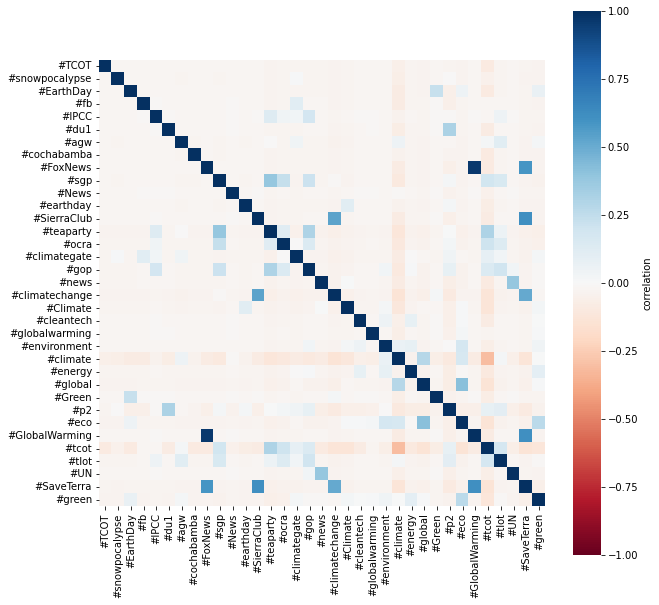

In [ ]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

From the plot above we can see that there are fairly strong correlations between: 
>#SaveTerra and #SierraClub

>#GloablWarming and #FoxNews

We can also see a fairly strong negative correlation between:

>#tcot and #climate

##**2.5. What is the Topic Modelling?**
We will be using latent dirichlet allocation (LDA) and  non-negative matric factorisation (NMF).

The important information to know is that these techniques each take a matrix which is similar to the hashtag_vector_df dataframe that we created above. 
Every row represents a tweet and every column represents a word. The entry at each row-column position is the number of times that a given word appears in the tweet for the row, this is called the bag-of-words format. 
For the word-set [#photography, #pets, #funny, #day], the tweet ‘#funny #funny #photography #pets’ would be [1,1,2,0] in vector form.

Using this matrix the topic modelling algorithms will form topics from the words. 
Each of the algorithms does this in a different way, but the basics are that the algorithms look at the co-occurrence of words in the tweets and if words often appearing in the same tweets together, then these words are likely to form a topic together. The algorithm will form topics which group commonly co-occurring words. 
A topic in this sense, is just list of words that often appear together and also scores associated with each of these words in the topic. 
The higher the score of a word in a topic, the higher that word’s importance in the topic. Each topic will have a score for every word found in tweets, in order to make sense of the topics we usually only look at the top words - the words with low scores are irrelevant.
For example, from a topic model built on a collection on marine research articles might find the topic: 

>asteroidea, starfish, legs, regenerate, ecological, marine, asexually, …

and the accompanying scores for each word in this topic could be:

>900, 666, 523, 503, 392, 299, 127, …
We can see that this seems to be a general topic about starfish, but the important part is that we have to decide what these topics mean by interpreting the top words. 

##**2.6. Cleaning Unstructured Text Data**

First we will start with imports for this specific cleaning task.

We will need the stopwords from NLTK and spacy’s en model for text pre-processing. Later, we will be using the spacy model for lemmatization.

Lemmatization is nothing but converting a word to its root word. For example: the lemma of the word ‘machines’ is ‘machine’. Likewise, ‘walking’ –> ‘walk’, ‘mice’ –> ‘mouse’ and so on.

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

We will need to use nltk.download('stopwords') command to download the stopwords if you have not used nltk before.
##**In the cell below some functions to remove web-links from the tweets.**


In [ ]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [ ]:
import nltk; nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

##**Use the cleaning function above to make a new column of cleaned tweets. Set bigrams = False for the moment to keep things simple. This is something you could come back to later. Print this new column see if you can understand the gist of what each tweet is about.**


In [ ]:
df['clean_tweet'] = df.tweet.apply(clean_tweet)

In [ ]:
df.tail()

,tweet,is_retweet,retweeted,mentioned,hashtags,clean_tweet
6085,"@bloodless_coup ""The phrase 'global warming' s...",False,[],[@bloodless_coup],"[#p2, #tcot]",phrase global warm abandon favor climat chang...
6086,Virginia to Investigate Global Warming Scienti...,False,[],[],[],virginia investig global warm scientist mann
6087,Global warming you tube parody you will enjoy ...,False,[],[],"[#IPCC, #ocra]",global warm tube parodi enjoy #ipcc #ocra
6088,One-Eyed Golfer: Don't dare tell me about glob...,False,[],[],[],one eye golfer dare tell global warm twenti fi...
6089,man made global warming a hair brained theory ...,False,[],[],"[#tcot, #p2, #climategate]",man made global warm hair brain theori scient...


##**7. Applying Topic Modelling**
**To turn the text into a matrix, where each row in the matrix encodes which words appeared in each individual tweet:**
>#We will also filter the words max_df=0.9 means we discard any words that appear in >90% of tweets. 
>#We will also filter words using min_df=25, so words that appear in less than 25 tweets will be discarded. 
>#We discard high appearing words since they are too common to be meaningful in topics. 
>#We discard low appearing words because we won’t have a strong enough signal and they will just introduce noise to our model.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray() # #term frequency’ - the frequency of each word/token in each tweet). 

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

##**Note that the tf matrix is exactly like the hashtag_vector_df dataframe. Each row is a tweet and each column is a word. The numbers in each position tell us how many times this word appears in this tweet.**


In [ ]:
tf #term frequency’ The shape of tf tells us how many tweets we have 
   ##and how many words we have that made it through our filtering process.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

##**Next we actually create the model object. Lets start by arbitrarily choosing 10 topics. We also define the random state so that this model is reproducible.**

#**1. Using LDA**

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [ ]:
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

Next we will want to inspect our topics that we generated and try to extract meaningful information from them.

Below I have written a function which takes in our model object model, the order of the words in our matrix tf_feature_names and the number of words we would like to show. Use this function, which returns a dataframe, to show you the topics we created. Remember that each topic is a list of words/tokens and weights

In [ ]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)
    

In [ ]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,climat,1220.2,global,666.5,global,1147.2,global,473.1,climat,422.0,global,783.0,chang,666.1,warm,167.9,climat,568.3,climat,529.9
1,chang,1184.5,warm,658.1,warm,1102.1,warm,450.7,chang,401.8,warm,764.7,climat,661.6,#climate,139.2,chang,550.5,chang,520.6
2,via,257.9,snow,160.5,scientist,150.2,believ,101.3,legisl,123.2,gore,137.1,energi,178.8,volcano,128.9,new,321.1,peopl,153.4
3,scienc,112.9,#tcot,121.6,say,87.1,california,87.1,us,105.1,snow,123.7,u,109.8,global,128.6,bill,116.9,world,151.3
4,news,79.5,like,99.0,scienc,71.7,blame,82.1,via,60.5,al,122.1,via,96.5,chang,122.0,senat,106.1,confer,110.1
5,day,77.8,blizzard,90.9,debat,66.6,law,78.6,say,55.9,great,94.1,nation,89.0,help,114.1,agenc,95.1,bill,106.4
6,earth,68.2,dc,86.5,man,61.1,report,77.8,video,55.9,cold,77.1,make,74.5,take,96.8,immigr,77.7,talk,94.8
7,trial,68.1,think,83.3,made,54.0,save,61.8,place,54.1,call,76.5,impact,67.5,climat,76.7,obama,75.6,graham,92.1
8,clinic,68.1,due,80.1,show,51.9,money,56.1,good,52.6,#tcot,75.3,report,63.4,iceland,67.1,feder,67.1,un,77.6
9,carbon,64.5,make,70.4,water,50.6,live,49.3,human,48.2,one,72.1,issu,58.8,could,64.5,via,58.6,put,68.8


#**2. Using NMF**

In [ ]:
from sklearn.decomposition import NMF
from sklearn import metrics

In [ ]:
model_NMF = NMF(n_components=10, random_state=0, alpha=.1, l1_ratio=.5) 
model_NMF.fit(tf)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
    n_components=10, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
display_topics(model_NMF, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,climat,10.8,global,9.3,via,7.7,snow,5.4,bill,5.2,new,6.0,#climate,4.9,peopl,3.8,say,4.4,#tcot,5.6
1,chang,9.8,warm,9.1,news,1.5,dc,1.9,senat,2.5,agenc,1.9,chang,4.6,world,3.4,report,3.3,#p,1.7
2,energi,0.3,make,0.3,humanitarian,0.6,gore,1.4,graham,1.6,obama,1.2,#global,1.0,earth,2.3,caus,2.4,#teaparty,1.0
3,scienc,0.3,could,0.2,chang,0.4,al,1.3,put,1.1,feder,1.2,#eco,0.8,confer,2.2,scientist,1.8,#gop,0.6
4,fight,0.3,scienc,0.2,india,0.3,mean,1.2,limbo,0.8,form,1.0,warm,0.7,right,1.3,us,1.0,scam,0.6
5,legisl,0.3,think,0.2,com,0.2,jr,1.0,exit,0.8,studi,0.7,us,0.4,bolivia,1.0,govern,0.8,dc,0.6
6,u,0.3,stop,0.2,un,0.1,storm,1.0,climat,0.7,administr,0.7,fact,0.3,day,1.0,may,0.8,gore,0.5
7,un,0.3,effect,0.2,environ,0.1,cold,0.9,compromis,0.7,propos,0.6,nasa,0.3,mother,1.0,u,0.4,#ocra,0.5
8,get,0.2,volcano,0.2,mean,0.1,washington,0.9,prepar,0.7,york,0.6,#p,0.3,indigen,0.4,carbon,0.3,al,0.5
9,action,0.2,believ,0.2,impact,0.1,ago,0.9,immigr,0.6,report,0.5,thought,0.3,cochabamba,0.3,china,0.3,#tlot,0.5


In [ ]:
pip install gensim


In [ ]:
!pip install --upgrade gensim

In [ ]:
from gensim.models import CoherenceModel, LdaModel, TfidfModel
from gensim.models.nmf import Nmf 

In [ ]:
pip install pyLDAvis

In [ ]:
pip install --upgrade pip

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
pip install --upgrade jupyter notebook


     |████████████████████████████████| 9.9 MB 5.0 MB/s            
     |████████████████████████████████| 428 kB 66.9 MB/s            
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.3.0; python_version >= "3.0", but you have notebook 6.4.4 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.3 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.


# **## Second trial**

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.nmf import Nmf as GensimNmf


# spacy for lemmatization
import spacy


import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

#**Prepare StopWords**

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

#**1. Import Newsgroups Data**




In [ ]:
# Import Dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
print(df.target_names.unique())
df.head()

['rec.autos' 'comp.sys.mac.hardware' 'comp.graphics' 'sci.space'
 'talk.politics.guns' 'sci.med' 'comp.sys.ibm.pc.hardware'
 'comp.os.ms-windows.misc' 'rec.motorcycles' 'talk.religion.misc'
 'misc.forsale' 'alt.atheism' 'sci.electronics' 'comp.windows.x'
 'rec.sport.hockey' 'rec.sport.baseball' 'soc.religion.christian'
 'talk.politics.mideast' 'talk.politics.misc' 'sci.crypt']


,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


#**1.1 Remove emails and newline characters**
As you can see there are many emails, newline and extra spaces that is quite distracting. Let’s get rid of them using regular expressions.

In [ ]:
# Convert to list
data = df.content.values.tolist()
pprint(data[:1])

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[0:1])

["From: lerxst@wam.umd.edu (where's my thing)\n"
 'Subject: WHAT car is this!?\n'
 'Nntp-Posting-Host: rac3.wam.umd.edu\n'
 'Organization: University of Maryland, College Park\n'
 'Lines: 15\n'
 '\n'
 ' I was wondering if anyone out there could enlighten me on this car I saw\n'
 'the other day. It was a 2-door sports car, looked to be from the late 60s/\n'
 'early 70s. It was called a Bricklin. The doors were really small. In '
 'addition,\n'
 'the front bumper was separate from the rest of the body. This is \n'
 'all I know. If anyone can tellme a model name, engine specs, years\n'
 'of production, where this car is made, history, or whatever info you\n'
 'have on this funky looking car, please e-mail.\n'
 '\n'
 'Thanks,\n'
 '- IL\n'
 '   ---- brought to you by your neighborhood Lerxst ----\n'
 '\n'
 '\n'
 '\n'
 '\n']
['From: (wheres my thing) Subject: WHAT car is this!? Nntp-Posting-Host: '
 'rac3.wam.umd.edu Organization: University of Maryland, College Park Lines: '
 '15 I was wond

#**1.2 Tokenize words and Clean-up text**

#**We need to break down each sentence into a list of words through tokenization, while clearing up all the messy text in the process.**

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']]


#**2. Creating Bigram and Trigram Models**
**Bigrams** are two words frequently occurring together in the document. 
**Trigrams** are 3 words frequently occurring.
Some examples in our example are: ‘front_bumper’, ‘oil_leak’, ‘maryland_college_park’ etc.

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp_posting_host', 'rac_wam_umd_edu', 'organization', 'university', 'of', 'maryland_college_park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front_bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']


#**3. Remove Stopwords, Make Bigrams and Lemmatize**
The bigrams model is ready. Let’s define the functions to remove the stopwords, make bigrams and lemmatization and call them sequentially.



In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


##**Let’s call the functions in order.**



In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['where', 'thing', 'car', 'nntp_poste', 'host', 'park', 'line', 'wonder', 'could', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'bricklin', 'door', 'really', 'small', 'addition', 'separate', 'rest', 'body', 'know', 'tellme', 'model', 'name', 'engine', 'year', 'production', 'car', 'make', 'history', 'info', 'funky', 'look', 'car', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst']]


##**4. Create the Dictionary and Corpus needed for Topic Modeling**
The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.



In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized 

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts] #corpus is a stream of input documents = training examples:
                                                   #bow -->bag-of-words format -> mapping of (word_id, word_frequency).
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 5), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]]


##**As we can see above: For example, (0, 1) above implies, word id 0 occurs once in the first document. Likewise, word id 1 occurs twice and so on. This is used as the input by the LDA model.**

#**5. Building the Topic Model**
We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well.

Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior.

chunksize is the number of documents to be used in each training chunk. update_every determines how often the model parameters should be updated and passes is the total number of training passes.

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

#**View the topics in LDA model**
The above LDA model is built with 20 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.049*"year" + 0.023*"last" + 0.023*"team" + 0.021*"game" + 0.021*"first" + '
  '0.017*"go" + 0.016*"next" + 0.016*"play" + 0.015*"win" + 0.014*"start"'),
 (1,
  '0.076*"church" + 0.053*"cpu" + 0.041*"turkish" + 0.036*"son" + '
  '0.032*"armenian" + 0.027*"upgrade" + 0.021*"inhabitant" + 0.019*"escape" + '
  '0.019*"soul" + 0.018*"proceed"'),
 (2,
  '0.262*"ax" + 0.222*"max" + 0.075*"character" + 0.037*"font" + '
  '0.020*"trivial" + 0.012*"plot" + 0.012*"click" + 0.004*"rushdie" + '
  '0.004*"precedent" + 0.001*"islamic_law"'),
 (3,
  '0.124*"law" + 0.048*"israeli" + 0.036*"format" + 0.036*"jewish" + '
  '0.032*"state" + 0.030*"citizen" + 0.030*"willing" + 0.022*"waste" + '
  '0.019*"party" + 0.019*"homosexual"'),
 (4,
  '0.041*"patient" + 0.029*"body" + 0.024*"police" + 0.023*"eat" + '
  '0.021*"safety" + 0.021*"route" + 0.020*"cool" + 0.019*"treatment" + '
  '0.019*"meet" + 0.019*"disease"'),
 (5,
  '0.022*"may" + 0.017*"make" + 0.014*"people" + 0.013*"also" + 0.012*"many" +

##**How to interpret this?**

Topic 0 is a represented as _0.016“car” + 0.014“power” + 0.010“light” + 0.009“drive” + 0.007“mount” + 0.007“controller” + 0.007“cool” + 0.007“engine” + 0.007“back” + ‘0.006“turn”.

It means the top 10 keywords that contribute to this topic are: ‘car’, ‘power’, ‘light’.. and so on and the weight of ‘car’ on topic 0 is 0.016.
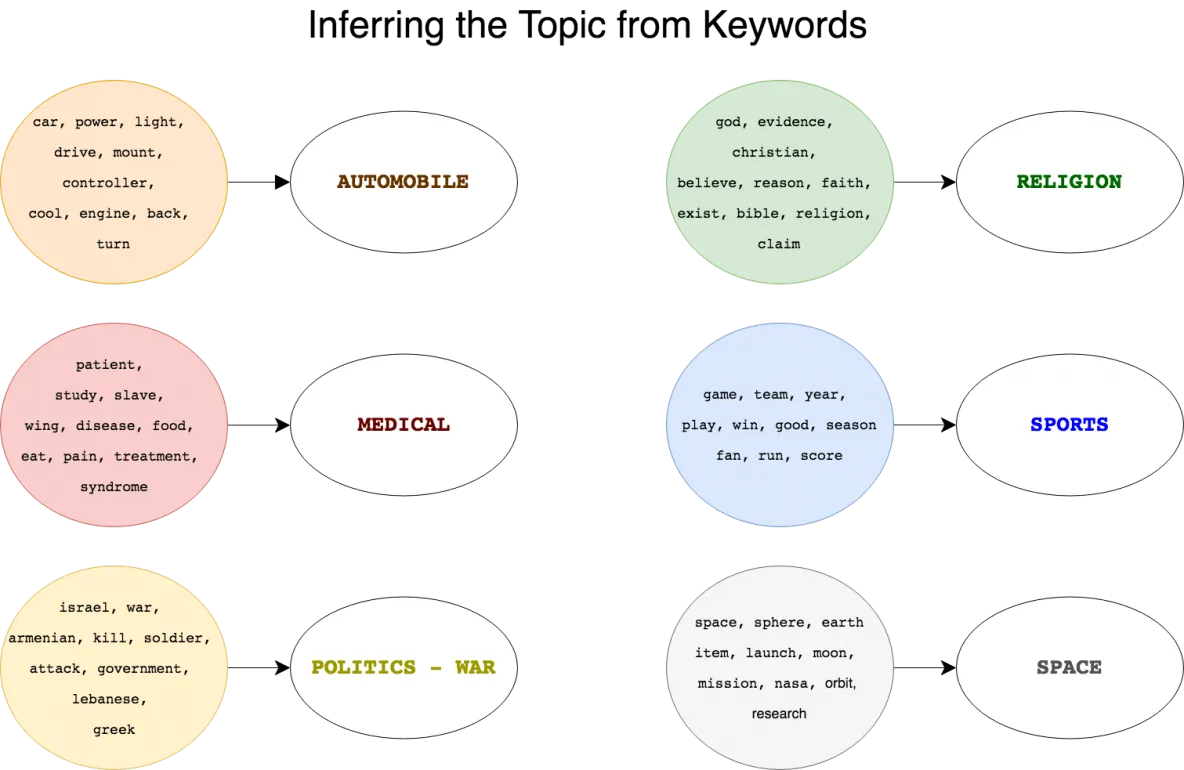

##**5. Compute Model Perplexity and Coherence Score**
Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been more helpful.



In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -12.89426769844373

Coherence Score:  0.46006848849944637


#**Using NMF**

In [ ]:
nmf = GensimNmf(
    corpus=corpus,
    num_topics=20,
    id2word=id2word,
    chunksize=100,
    passes=10,
    eval_every=10,
    minimum_probability=0,
    random_state=100,
    kappa=1,
)

In [ ]:
# Print the Keyword in the 10 topics
pprint(nmf.print_topics())
doc_nmf = nmf[corpus]

[(0,
  '0.024*"gun" + 0.014*"law" + 0.012*"firearm" + 0.010*"state" + 0.010*"right" '
  '+ 0.009*"file" + 0.009*"article" + 0.008*"crime" + 0.007*"report" + '
  '0.007*"issue"'),
 (1,
  '0.015*"may" + 0.014*"entry" + 0.012*"atheist" + 0.009*"many" + 0.009*"must" '
  '+ 0.009*"make" + 0.009*"believe" + 0.008*"exist" + 0.007*"religion" + '
  '0.006*"question"'),
 (2,
  '0.051*"write" + 0.047*"line" + 0.026*"article" + 0.014*"output" + '
  '0.011*"read" + 0.009*"open" + 0.009*"program" + 0.009*"host" + '
  '0.008*"return" + 0.007*"name"'),
 (3,
  '0.036*"drive" + 0.017*"system" + 0.014*"scsi" + 0.013*"use" + '
  '0.012*"problem" + 0.012*"bit" + 0.010*"window" + 0.010*"driver" + '
  '0.010*"support" + 0.009*"run"'),
 (4,
  '0.102*"would" + 0.012*"could" + 0.012*"think" + 0.009*"good" + 0.008*"be" + '
  '0.008*"make" + 0.007*"time" + 0.007*"know" + 0.006*"really" + 0.006*"seem"'),
 (5,
  '0.022*"come" + 0.019*"go" + 0.015*"take" + 0.014*"could" + 0.013*"see" + '
  '0.013*"know" + 0.011*"apa

In [ ]:
# Compute Coherence Score
coherence_model_nmf = CoherenceModel(model=nmf, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_nmf = coherence_model_nmf.get_coherence()
print('\nCoherence Score: ', coherence_nmf)


Coherence Score:  0.5517586888246168


#**6.Conclusion**
Coherence measures the relative distance between words within a topic. There are two major types C_V typically 0 < x < 1 and uMass -14 < x < 14. The overall coherence score of a topic is the average of the distances between words.I would say:
Coherence Score:  0.5 for NMF
Coherence Score:  0.4 for LDA
so, NMF is better than LDA for topic modeling.

